### Logistic Regression with 'GD' (gradient descent) and 'SGD' (stochastic GD)

In [1]:
import numpy as np

In [2]:
class LogisticRegression():
        
        #********************************************************************
        # INITIALIZING  
        #********************************************************************
        def __init__(self, mode = "SGD", learn_rate = 0.01, nb_epochs = 1000, batch_size = 32, beta = 0.9, tolerance = 1e-4):
            if mode not in ["GD", "SGD"]:
                raise ValueError(mode + " is not a valid choice.")
            self.mode = mode
            # parameters
            self.Theta = None
            # learning rate  
            self.learn_rate = learn_rate
            # number of max iterations 
            self.nb_epochs = nb_epochs
            # optimizing with momentum 
            self.beta = beta
            self.mo = None
            # the minimum value of norm(grad) for momentum optimization
            self.tolerance = tolerance
            # size of batch in SGD
            self.batch_size = batch_size
            
        
        
        #********************************************************************    
        # SIGMOID FUNCTION
        #********************************************************************
        
        def __sigmoid(self, z):
            return 1 / (1 + np.exp(-z))
        
        
        
        #********************************************************************    
        # LOSS FUNCTION
        #********************************************************************
        
        def __loss(self, h, y):
            return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        
        
        #********************************************************************
        # FIT 
        #********************************************************************
        
        def fit(self, X, Y):
            
            X_1 = np.c_[np.ones(X.shape[0]), X]

                        
            #----------------------------------------------------------------
            # Gradient Descent
            #----------------------------------------------------------------
            
            if self.mode == "GD":
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                z = X_1.dot(self.Theta)
                h = self.__sigmoid(z)
                grad =  X_1.T.dot((h - Y)) / X_1.shape[0]
                for i in range(self.nb_epochs):
                    # check that gradient is not too small value
                    if np.linalg.norm(grad) > self.tolerance:
                        self.Theta -= self.learn_rate*grad
                        z = X_1.dot(self.Theta)
                        h = self.__sigmoid(z)
                        grad =  X_1.T.dot((h - Y)) / X_1.shape[0]
                        #print(self.__loss(h, Y))
                return True
            
            
         
            #----------------------------------------------------------------
            # Stochastic Gradient Descent
            #----------------------------------------------------------------
            
            elif self.mode == "SGD":                
                if self.Theta is None:
                    self.Theta = np.zeros((X_1.shape[1], 1))
                    
                # Calculating number of batches
                nb_X = X_1.shape[0]
                nb_batch = int(nb_X / self.batch_size)
            
                # If size of last batch is less that batch_size
                # then consider it as another batch anyway
                if nb_X % nb_batch != 0:
                    nb_batch += 1
                 
                for i in range(self.nb_epochs):
                    # returns permuted range 
                    permuted_nb_batch = np.random.permutation(nb_batch)
                
                    for batch in range(nb_batch):
                        # we run through the list of permuted batches
                        # len(permuted_nb_batch) = nb_batch
                        j = permuted_nb_batch[batch]                    
                        x_batch = X_1[j*self.batch_size:(j+1)*self.batch_size,:]
                        y_batch = Y[j*self.batch_size:(j+1)*self.batch_size,:]
                                        
                        z = x_batch.dot(self.Theta)
                        h = self.__sigmoid(z)
                        grad =  x_batch.T.dot((h - y_batch)) / x_batch.shape[0]
                        self.Theta -= self.learn_rate*grad
                return True
            
                     
        
        #********************************************************************
        # PREDICT 
        #********************************************************************                
            
        def predict(self, X):
            if self.Theta is None:
                return False
            else:
                X_1 = np.c_[np.ones(X.shape[0]), X]
                return self.__sigmoid(X_1.dot(self.Theta))
        
        
        #********************************************************************
        # Accuracy 
        #******************************************************************** 
        def accuracy(self, y_pred, y):
            return np.mean(np.abs(y_pred - y))   


### Examples

### Simple data set

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn import datasets

iris = datasets.load_iris()

x = iris.data
y_ini = iris.target
y_fin = y_ini.copy()
y_fin[ y_fin==2 ] = 1

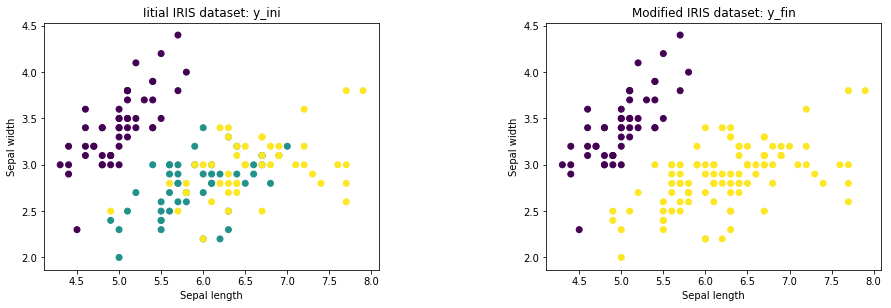

In [5]:
fig1 = plt.figure(figsize=(15, 10))

plt.subplots_adjust(wspace = 0.5)
plt.subplot(221)
plt.title('Iitial IRIS dataset: y_ini')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x[:, 0], x[:, 1], c = y_ini)

plt.subplot(222)
plt.title('Modified IRIS dataset: y_fin')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x[:, 0], x[:, 1], c = y_fin)

In [6]:
y = y_fin.reshape(150, 1)
simple_modelGD = LogisticRegression(mode="GD", nb_epochs=10)

print('\n GD:')
%time simple_modelGD.fit(x, y)
print('\n', simple_modelGD.Theta)
y_predGD = simple_modelGD.predict(x)
accuracy = simple_modelGD.accuracy(y_predGD, y)
print('Accuracy: %f \n' % accuracy)

print('\n SGD: ')
simple_modelSGD = LogisticRegression(mode="SGD", nb_epochs=10)

%time simple_modelSGD.fit(x, y)
print('\n', simple_modelSGD.Theta)
y_predSGD = simple_modelSGD.predict(x)
accuracyS = simple_modelSGD.accuracy(y_predSGD, y)
print('Accuracy: ', accuracyS)


 GD:
Wall time: 0 ns

 [[ 0.00589804]
 [ 0.06018541]
 [ 0.00629696]
 [ 0.09363909]
 [ 0.03679188]]
Accuracy: 0.395667 


 SGD: 
Wall time: 10 ms

 [[-0.01283834]
 [ 0.04035604]
 [-0.09130039]
 [ 0.2729674 ]
 [ 0.1191016 ]]
Accuracy:  0.314248418016


In [7]:
y = y_fin.reshape(150, 1)
simple_modelGD2 = LogisticRegression(mode="GD", nb_epochs=100)

print('\n GD: ')
%time simple_modelGD2.fit(x, y)
print('\n', simple_modelGD2.Theta)
y_predGD2 = simple_modelGD2.predict(x)
accuracy2 = simple_modelGD2.accuracy(y_predGD2, y)
print('Accuracy: ', accuracy2)

print('\n SGD: ')
simple_modelSGD2 = LogisticRegression(mode="SGD", nb_epochs=100)

%time simple_modelSGD2.fit(x, y)
print('\n', simple_modelSGD2.Theta)
y_predSGD2 = simple_modelSGD2.predict(x)
accuracyS2 = simple_modelSGD2.accuracy(y_predSGD2, y)
print('Accuracy: ', accuracyS2)


 GD: 
Wall time: 10 ms

 [[-0.03741323]
 [-0.01724701]
 [-0.2111827 ]
 [ 0.42698095]
 [ 0.19074081]]
Accuracy:  0.262770017001

 SGD: 
Wall time: 20 ms

 [[-0.12817437]
 [-0.18678375]
 [-0.66249471]
 [ 1.0982053 ]
 [ 0.50271125]]
Accuracy:  0.0992201104119


In [8]:
y = y_fin.reshape(150, 1)
simple_modelGD3 = LogisticRegression(mode="GD", nb_epochs=500)

print('\n GD: ')
%time simple_modelGD3.fit(x, y)
print('\n', simple_modelGD3.Theta)
y_predGD3 = simple_modelGD3.predict(x)
accuracy3 = simple_modelGD3.accuracy(y_predGD3, y)
print('Accuracy: ', accuracy3)

print('\n SGD: ')
simple_modelSGD3 = LogisticRegression(mode="SGD", nb_epochs=500)

%time simple_modelSGD3.fit(x, y)
print('\n', simple_modelSGD3.Theta)
y_predSGD3 = simple_modelSGD3.predict(x)
accuracyS3 = simple_modelSGD3.accuracy(y_predSGD3, y)
print('Accuracy: ', accuracyS3)


 GD: 
Wall time: 30 ms

 [[-0.12810613]
 [-0.18929205]
 [-0.66972849]
 [ 1.09952797]
 [ 0.49984976]]
Accuracy:  0.0988358833756

 SGD: 
Wall time: 90 ms

 [[-0.23862652]
 [-0.37450175]
 [-1.24122397]
 [ 1.97451967]
 [ 0.90171144]]
Accuracy:  0.0256992250478


In [9]:
y = y_fin.reshape(150, 1)
simple_modelGD4 = LogisticRegression(mode="GD", nb_epochs=3000)

%time simple_modelGD4.fit(x, y)
print('\n', simple_modelGD4.Theta)
y_predGD4 = simple_modelGD4.predict(x)
accuracy4 = simple_modelGD4.accuracy(y_predGD4, y)
print('\n Accuracy: ', accuracy4)

Wall time: 110 ms

 [[-0.25220136]
 [-0.39722705]
 [-1.32926112]
 [ 2.10075566]
 [ 0.95338266]]

 Accuracy:  0.0212346120559


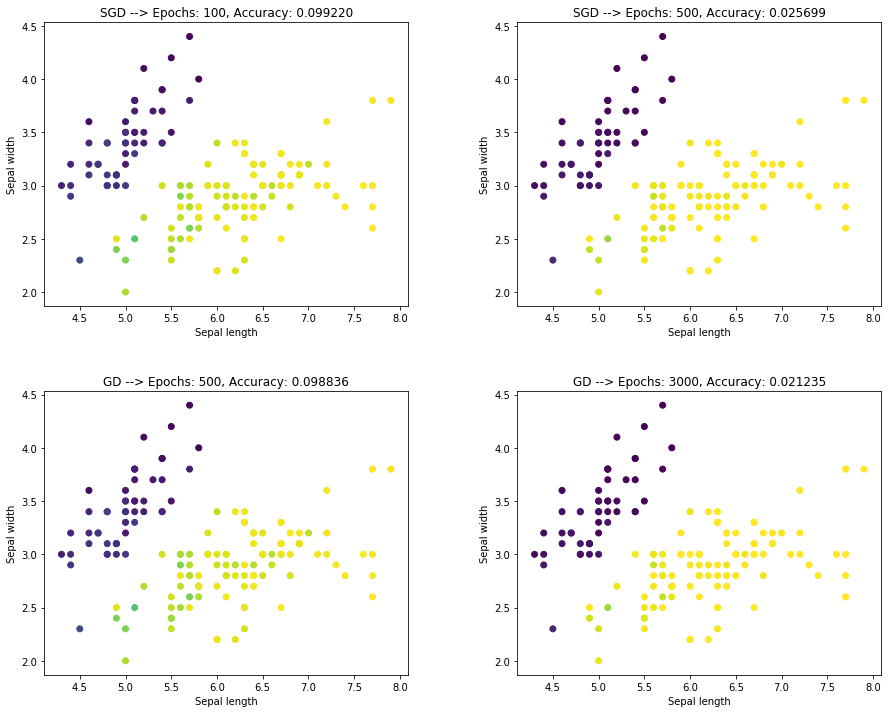

In [10]:
fig2 = plt.figure(figsize=(15, 12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

plt.subplot(221)
plt.title('SGD --> Epochs: %d, Accuracy: %f' % (simple_modelSGD2.nb_epochs, accuracyS2))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x[:, 0], x[:, 1], c = y_predSGD2.reshape(150,))

plt.subplot(222)
plt.title('SGD --> Epochs: %d, Accuracy: %f' % (simple_modelSGD3.nb_epochs, accuracyS3))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x[:, 0], x[:, 1], c = y_predSGD3.reshape(150,))

plt.subplot(223)
plt.title('GD --> Epochs: %d, Accuracy: %f' % (simple_modelGD3.nb_epochs, accuracy3))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x[:, 0], x[:, 1], c = y_predGD3.reshape(150,))

plt.subplot(224)
plt.title('GD --> Epochs: %d, Accuracy: %f' % (simple_modelGD4.nb_epochs, accuracy4))
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.scatter(x[:, 0], x[:, 1], c = y_predGD4.reshape(150,))